In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('nba.csv')

In [3]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [4]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [5]:
df.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [7]:
df.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

In [8]:
df.isna().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [9]:
df.shape

(458, 9)

In [10]:
df = df.fillna(df.mean())

In [11]:
df.isna().sum()

Name         1
Team         1
Number       0
Position     1
Age          0
Height       1
Weight       0
College     85
Salary       0
dtype: int64

In [15]:
groupheight = df.groupby(df['Height'])

In [17]:
groupheight.get_group('5-11')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
22,Shane Larkin,Brooklyn Nets,0.0,PG,23.0,5-11,175.0,Miami (FL),1500000.0
130,Phil Pressey,Phoenix Suns,25.0,PG,25.0,5-11,175.0,Missouri,55722.0
203,Ty Lawson,Indiana Pacers,10.0,PG,28.0,5-11,195.0,North Carolina,211744.0


In [25]:
df.Age.value_counts()

24.000000    47
25.000000    45
27.000000    41
23.000000    41
26.000000    36
28.000000    31
30.000000    31
29.000000    28
22.000000    26
31.000000    22
20.000000    19
21.000000    19
33.000000    14
32.000000    13
34.000000    10
36.000000    10
35.000000     9
37.000000     4
38.000000     4
40.000000     3
39.000000     2
19.000000     2
26.938731     1
Name: Age, dtype: int64

In [31]:
bins = [19,25,31,36,40]
labels = ['19-24','25-30','31-35','36-40']
df['Age Group'] = pd.cut(df['Age'],bins = bins,labels = labels,right = False)

In [32]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Age Group
0,Avery Bradley,Boston Celtics,0.000000,PG,25.000000,6-2,180.000000,Texas,7.730337e+06,25-30
1,Jae Crowder,Boston Celtics,99.000000,SF,25.000000,6-6,235.000000,Marquette,6.796117e+06,25-30
2,John Holland,Boston Celtics,30.000000,SG,27.000000,6-5,205.000000,Boston University,4.842684e+06,25-30
3,R.J. Hunter,Boston Celtics,28.000000,SG,22.000000,6-5,185.000000,Georgia State,1.148640e+06,19-24
4,Jonas Jerebko,Boston Celtics,8.000000,PF,29.000000,6-10,231.000000,NaN,5.000000e+06,25-30
...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.000000,PG,26.000000,6-3,203.000000,Butler,2.433333e+06,25-30
454,Raul Neto,Utah Jazz,25.000000,PG,24.000000,6-1,179.000000,NaN,9.000000e+05,19-24
455,Tibor Pleiss,Utah Jazz,21.000000,C,26.000000,7-3,256.000000,NaN,2.900000e+06,25-30
456,Jeff Withey,Utah Jazz,24.000000,C,26.000000,7-0,231.000000,Kansas,9.472760e+05,25-30


In [36]:
newdf = df.groupby('Age Group')
newdf.mean()

,Number,Age,Weight,Salary
Age Group,,,,
19-24,17.220779,22.467532,218.500000,2.761705e+06
25-30,17.641682,27.253233,221.739544,5.866171e+06
31-35,17.470588,32.573529,226.926471,6.635271e+06
36-40,21.650000,36.900000,222.850000,3.897656e+06


In [37]:
newdf.describe()

Number                                                         Age  \
           count       mean        std  min    25%   50%    75%   max  count   
Age Group                                                                      
19-24      154.0  17.220779  15.474308  0.0   6.00  13.0  23.75  92.0  154.0   
25-30      213.0  17.641682  16.405354  0.0   5.00  13.0  25.00  99.0  213.0   
31-35       68.0  17.470588  16.855373  0.0   4.75  12.0  26.25  90.0   68.0   
36-40       20.0  21.650000  12.774461  3.0  11.75  21.0  31.75  42.0   20.0   

                      ...  Weight        Salary                              \
                mean  ...     75%    max  count          mean           std   
Age Group             ...                                                     
19-24      22.467532  ...  240.00  280.0  154.0  2.761705e+06  3.164929e+06   
25-30      27.253233  ...  240.00  307.0  213.0  5.866171e+06  5.459484e+06   
31-35      32.573529  ...  250.00  289.0   68.0  6.635271e+06  6.238296e+06   
36-40      36.900000  ...  241.25  260.0   20.0  3.897656e+06  5.373672e+06   

                                                                         
                min         25%           50%           75%         max  
Age Group                                                                
19-24       30888.0  1000000.00  1.721380e+06  3.150510e+06  16407501.0  
25-30       55722.0  1100602.00  4.050000e+06  8.988765e+06  22359364.0  
31-35      200600.0  2096417.75  4.671342e+06  9.667979e+06  22970500.0  
36-40      222888.0   947276.00  2.834470e+06  4.276685e+06  25000000.0  

[4 rows x 32 columns]

In [38]:
newdf['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Age Group,,,,,,,,
19-24,154.0,2.761705e+06,3.164929e+06,30888.0,1000000.00,1.721380e+06,3.150510e+06,16407501.0
25-30,213.0,5.866171e+06,5.459484e+06,55722.0,1100602.00,4.050000e+06,8.988765e+06,22359364.0
31-35,68.0,6.635271e+06,6.238296e+06,200600.0,2096417.75,4.671342e+06,9.667979e+06,22970500.0
36-40,20.0,3.897656e+06,5.373672e+06,222888.0,947276.00,2.834470e+06,4.276685e+06,25000000.0


In [39]:
df.groupby('Age Group')['Salary'].max()

Age Group
19-24    16407501.0
25-30    22359364.0
31-35    22970500.0
36-40    25000000.0
Name: Salary, dtype: float64

In [41]:
salarylist = list(newdf['Salary'])

In [45]:
salarylist

[('19-24',
  3       1148640.0
  6       1170960.0
  8       1824360.0
  9       3431040.0
  10      2569260.0
            ...    
  446    12000000.0
  447     1175880.0
  449     1348440.0
  452     2239800.0
  454      900000.0
  Name: Salary, Length: 154, dtype: float64),
 ('25-30',
  0      7.730337e+06
  1      6.796117e+06
  2      4.842684e+06
  4      5.000000e+06
  5      1.200000e+07
             ...     
  451    9.813480e+05
  453    2.433333e+06
  455    2.900000e+06
  456    9.472760e+05
  457    4.842684e+06
  Name: Salary, Length: 213, dtype: float64),
 ('31-35',
  19      6300000.0
  31      1635476.0
  33     22875000.0
  34      7402812.0
  43       947276.0
            ...    
  375    13000000.0
  394     4345000.0
  413     3750000.0
  415     3135000.0
  434     5016000.0
  Name: Salary, Length: 68, dtype: float64),
 ('36-40',
  46     4.842684e+06
  72     2.900000e+06
  93     5.675000e+06
  101    3.376000e+06
  102    9.477260e+05
  109    2.500000e+07
  119

In [48]:
newdf['Salary'].get_group('19-24')

3       1148640.0
6       1170960.0
8       1824360.0
9       3431040.0
10      2569260.0
          ...    
446    12000000.0
447     1175880.0
449     1348440.0
452     2239800.0
454      900000.0
Name: Salary, Length: 154, dtype: float64

<Axes: xlabel='Salary', ylabel='Count'>

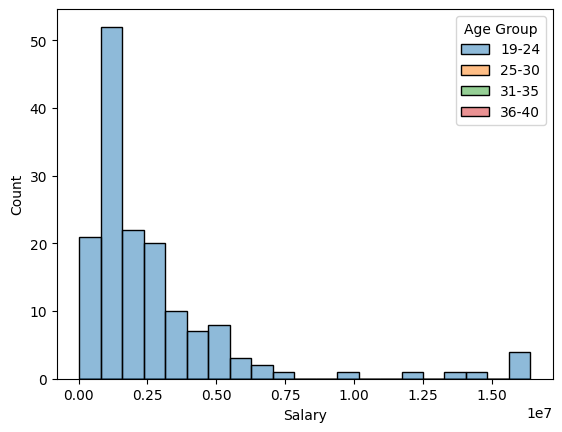

In [58]:
import seaborn as sns
sns.histplot(data = df,x = newdf['Salary'].get_group('19-24'),hue = df['Age Group'])